In [1]:
import numpy as np # linear algebra
import pandas as pd

data=pd.read_csv("Tweets.csv")
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [2]:
data.drop( 'textID', axis=1, inplace=True)

In [6]:
import seaborn as sns

[[1374  134   52]
 [ 836 3036  552]
 [ 124  166 1971]]
0.7739235900545786


MultinomialNB()

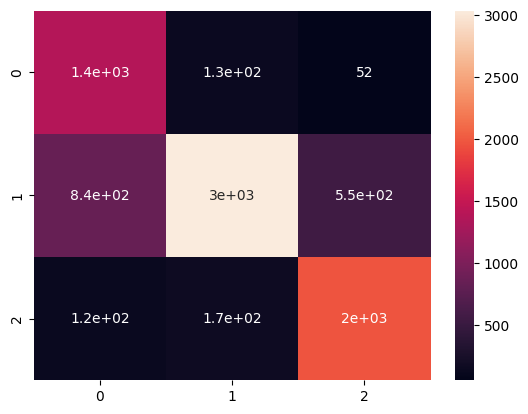

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,  ConfusionMatrixDisplay



X = data['selected_text'].values.astype('U')
y = data['sentiment'].values.astype('U')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

pipe = Pipeline([('tfidf_vectorizer',TfidfVectorizer(lowercase = True,
                                                     stop_words = 'english',
                                                    analyzer = 'word')),
                 
                 ('naive_bayes', MultinomialNB())])


le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

pipe.fit(list(X_train), list(y_train))
y_pred = pipe.predict(X_test)
print(confusion_matrix(y_pred, y_test))
sns.heatmap(np.round(confusion_matrix(y_pred, y_test)).astype(int),annot=True)

print(accuracy_score(y_pred, y_test))
pipe['naive_bayes']

In [5]:
import pickle

pickled_model = pickle.load(open('model.pkl', 'rb'))
o=pickled_model.predict(["I love you"])
o[0]

/Users/a2024/Desktop/Adrig Hackathon/.venv/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.2.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/a2024/Desktop/Adrig Hackathon/.venv/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.2.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/a2024/Desktop/Adrig Hackathon/.venv/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpi

2